<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/7.a.%20Recurrent%20Neural%20Network%20(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

🌱 شبکه های عصبی بازگشتی (Recurrent Neural Network (RNN))

🧠 ایده اصلی RNN

شبکه‌های معمولی فقط همون لحظه به داده نگاه می‌کنن.

ولی در خیلی از مسائل، گذشته هم مهمه. مثلاً:

وقتی داری یک متن می‌خونی، معنی کلمه‌ی الان به کلمات قبلش بستگی داره.

وقتی به ECG نگاه می‌کنیم، وضعیت الان قلب به ضربان‌های قبلی بستگی داره.

اینجاست که RNN وارد میشه 👇

🔄 فرق RNN با شبکه‌های ساده

در RNN هر خروجی فقط به ورودی الان وابسته نیست،
بلکه به یادآوری از قبل هم وابسته است.

یعنی شبکه یک "حافظه کوچک" داره که اتفاقات قبلی رو ذخیره می‌کنه.

📦 تشبیه خیلی ساده

تصور کن یک نفر داره جمله‌ای رو می‌نویسه:

شبکه‌ی ساده فقط همون کلمه‌ای که الان می‌بینه رو پردازش می‌کنه.

ولی RNN مثل کسیه که دفترچه یادداشت داره و تا الان هرچی خونده یادش می‌مونه و در تفسیر کلمه‌ی جدید ازش استفاده می‌کنه.

✨ کاربردهای RNN

زبان و متن → ترجمه، چت‌بات، پیش‌بینی کلمه بعدی.

صدا → تشخیص گفتار، تولید موسیقی.

پزشکی → تحلیل ECG، EEG، یا علائم حیاتی بیماران.

مالی → پیش‌بینی قیمت سهام یا ارز.

📌 یک جمله‌ی خیلی ساده

👉 RNN یعنی یک شبکه عصبی که علاوه بر دیدن "الان"، گذشته رو هم در نظر می‌گیره.




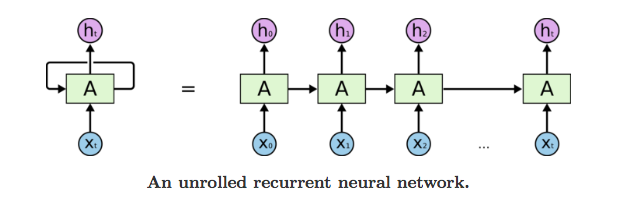

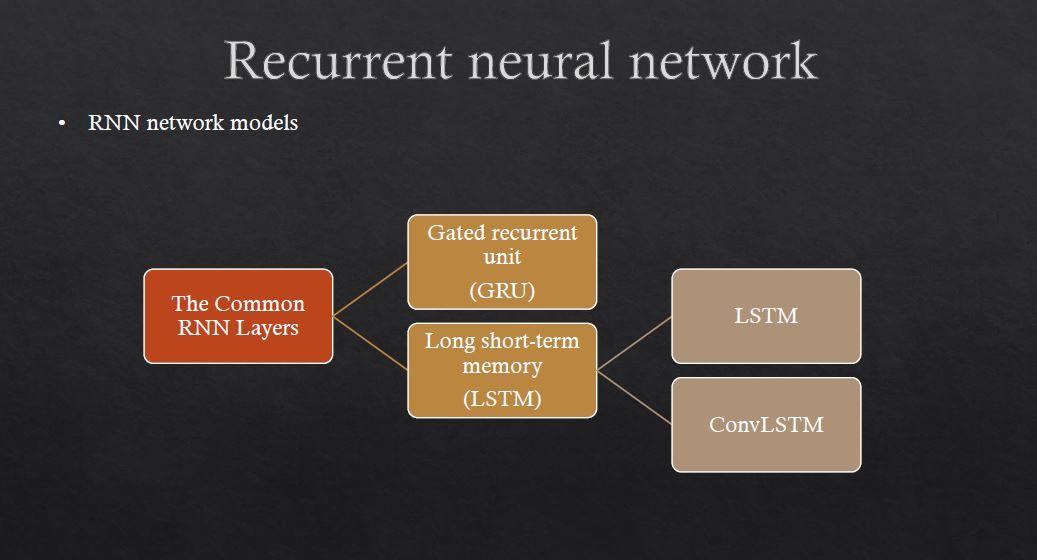

<div dir="rtl" align="right">

مثال
پیشبینی سیگنال های قلبی

یکی از معروف‌ترین دیتاست‌ها در حوزه پزشکی ECG (سیگنال قلب) هست.

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8130 - loss: 0.4785 - val_accuracy: 0.9563 - val_loss: 0.1159
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9899 - loss: 0.0644 - val_accuracy: 1.0000 - val_loss: 0.0218
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0053
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.0052
Accuracy on test data: 1.00


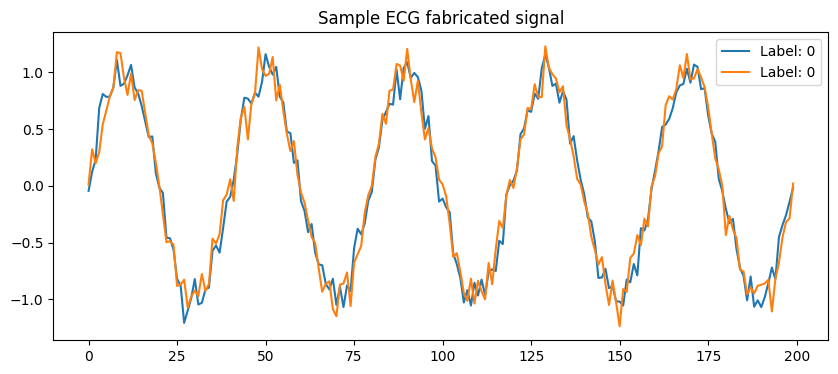

In [2]:
# کتابخانه‌های مورد نیاز
import numpy as np                  # برای محاسبات عددی و ساخت داده
import matplotlib.pyplot as plt     # برای رسم نمودار
from keras.models import Sequential # برای ساخت مدل ترتیبی (ساده)
from keras.layers import SimpleRNN, Dense  # لایه‌های شبکه (RNN و Dense)
from sklearn.model_selection import train_test_split # برای تقسیم داده به آموزش/تست

# -----------------------------
# 1. تابع تولید داده ECG ساختگی
# -----------------------------
def generate_ecg(num_samples=1000, length=200):
    X = []  # لیست برای نگه داشتن سیگنال‌ها
    y = []  # لیست برای نگه داشتن برچسب‌ها (۰ = نرمال، ۱ = غیرنرمال)

    for i in range(num_samples):  # برای هر نمونه
        t = np.linspace(0, 1, length)  # بازه زمان (۰ تا ۱ ثانیه)

        if np.random.rand() > 0.5:  # نصف مواقع سیگنال نرمال
            # موج سینوسی (فرکانس ۵ هرتز) + کمی نویز
            signal = np.sin(2 * np.pi * 5 * t) + 0.1*np.random.randn(length)
            y.append(0)  # برچسب = نرمال
        else:  # نصف دیگر مواقع سیگنال غیرعادی
            # موج سینوسی با فرکانس متفاوت و نویز بیشتر
            signal = np.sin(2 * np.pi * (5 + np.random.randint(1, 5)) * t) + 0.3*np.random.randn(length)
            y.append(1)  # برچسب = غیرعادی

        X.append(signal)  # ذخیره سیگنال

    return np.array(X), np.array(y)  # تبدیل به آرایه numpy و برگرداندن

# تولید 2000 نمونه ECG با طول 200
X, y = generate_ecg(2000, 200)

# -----------------------------
# 2. تغییر شکل داده برای RNN
# -----------------------------
# شکل داده باید سه‌بعدی باشد: (تعداد نمونه‌ها، طول دنباله، تعداد ویژگی‌ها)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------
# 3. تقسیم داده به آموزش و تست
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. ساخت مدل با RNN ساده
# -----------------------------
model = Sequential()  # مدل ترتیبی
# لایه RNN با ۶۴ نورون و تابع فعال‌سازی tanh
model.add(SimpleRNN(64, activation='tanh', input_shape=(200, 1)))
# لایه خروجی: یک نورون با sigmoid (خروجی بین ۰ و ۱ → تشخیص نرمال/غیرنرمال)
model.add(Dense(1, activation='sigmoid'))

# -----------------------------
# 5. کامپایل مدل
# -----------------------------
# - adam: الگوریتم یادگیری
# - binary_crossentropy: برای مسائل دودویی (۰ یا ۱)
# - accuracy: معیار دقت
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 6. آموزش مدل
# -----------------------------
# - داده آموزش
# - تعداد epoch = 5
# - batch_size = 32
# - validation_split=0.2 → بخشی از داده آموزش برای اعتبارسنجی
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# -----------------------------
# 7. ارزیابی مدل روی داده تست
# -----------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {acc:.2f}")

# -----------------------------
# 8. نمایش چند نمونه سیگنال
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(X[0].squeeze(), label=f"Label: {y[0]}")  # سیگنال اول
plt.plot(X[1].squeeze(), label=f"Label: {y[1]}")  # سیگنال دوم
plt.legend()
plt.title("Sample ECG fabricated signal")
plt.show()
